#Import Library and Data

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
from plotly.offline import iplot
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dropout

In [3]:
import tensorflow as tf

In [4]:
df = pd.read_csv('/content/drive/MyDrive/Kuliah/KP/Clodeo/Colab Notebooks/Address_Update/clean_data/data_termin1.csv')
# df = pd.read_csv('/content/drive/MyDrive/Address_Clodeo/Address_Update/clean_data/data_termin1.csv')

In [9]:
df['Codex'] = df['Codex'].astype(object)
df = df.dropna()
df.isnull().sum()

street1       0
Codex         0
full_lower    0
dtype: int64

In [10]:
df

,street1,Codex,full_lower
0,Gang Veteran RT 01 RW 07 No.9 \nKelurahan Lub...,0,gang veteran rt 01 rw 07 no9 kelurahan lubang ...
1,Lingkungan TUMALIA kecamatan Turikale Keluraha...,1,lingkungan tumalia kecamatan turikale keluraha...
2,ds kalimalang dsn sragi lor rt03 rw02,2,ds kalimalang dsn sragi lor rt03 rw02
3,Desa Gunung Tandla rt 01 Rw 01\nkec. KAwalu\nk...,3,desa gunung tandla rt 01 rw 01 kec kawalu kota...
4,Ruko Mall Taman Palem No.70,4,ruko mall taman palem no70
...,...,...,...
499995,jl. Kampus VB no. 9 RT.009 Rw\n.008 Kel. Baba...,552,jl kampus vb no 9 rt009 rw 008 kel babakan sari
499996,Alamat: bojong poncol \n( patokan : kontrakan...,34,alamat bojong poncol patokan kontrakan pak haj...
499997,Jl. H saabah raya komplek unilever blok A2 no....,169,jl h saabah raya komplek unilever blok a2 no57...
499998,"kecamatan pujut desa Rembitan. Dusun peluk, RT 2.",3275,kecamatan pujut desa rembitan dusun peluk rt 2


#Load Model 500k

In [6]:
model = tf.keras.models.load_model('/content/drive/MyDrive/Kuliah/KP/Clodeo/Colab Notebooks/Address_Update/save_model/model_KP.h5')
# model = tf.keras.models.load_model('/content/drive/MyDrive/Address_Clodeo/Address_Update/save_model/model_KP.h5')

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 250, 100)          5000000   
                                                                 
 spatial_dropout1d (SpatialD  (None, 250, 100)         0         
 ropout1D)                                                       
                                                                 
 lstm (LSTM)                 (None, 100)               80400     
                                                                 
 dense (Dense)               (None, 6108)              616908    
                                                                 
Total params: 5,697,308
Trainable params: 5,697,308
Non-trainable params: 0
_________________________________________________________________


#Test Model

In [11]:
# The maximum number of words to be used. (most frequent)
MAX_NB_WORDS = 50000
# Max number of words in each statement.
MAX_SEQUENCE_LENGTH = 250
# This is fixed.
EMBEDDING_DIM = 100

tokenizer = Tokenizer(num_words=MAX_NB_WORDS, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
tokenizer.fit_on_texts(df['full_lower'].values)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 303867 unique tokens.


In [12]:
X = tokenizer.texts_to_sequences(df['full_lower'].values)
X = pad_sequences(X, maxlen=MAX_SEQUENCE_LENGTH)
print('Shape of data address:', X.shape)

Shape of data address: (499995, 250)


In [13]:
Y = pd.get_dummies(df['Codex']).values
print('Shape of label address:', Y.shape)

Shape of label address: (499995, 6108)


In [14]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.10, random_state = 42)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(449995, 250) (449995, 6108)
(50000, 250) (50000, 6108)


In [15]:
accr = model.evaluate(X_test,Y_test)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

1563/1563 [==============================] - 77s 49ms/step - loss: 2.0463 - accuracy: 0.6985
Test set
  Loss: 2.046
  Accuracy: 0.698


#Create Model

In [ ]:
def create_model():
  model = Sequential()
  model.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=X.shape[1]))
  model.add(SpatialDropout1D(0.2))
  model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
  model.add(Dense(6108, activation='softmax'))
  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  return model

model = create_model()

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 250, 100)          5000000   
                                                                 
 spatial_dropout1d (SpatialD  (None, 250, 100)         0         
 ropout1D)                                                       
                                                                 
 lstm (LSTM)                 (None, 100)               80400     
                                                                 
 dense (Dense)               (None, 6108)              616908    
                                                                 
Total params: 5,697,308
Trainable params: 5,697,308
Non-trainable params: 0
_________________________________________________________________


In [ ]:
epochs = 10
batch_size = 64

history = model.fit(
    X_train, 
    Y_train, 
    epochs=epochs, 
    batch_size=batch_size,
    validation_split=0.10,
    callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])

Epoch 1/10
6329/6329 [==============================] - 5165s 815ms/step - loss: 5.9446 - accuracy: 0.0955 - val_loss: 4.3437 - val_accuracy: 0.2960
Epoch 2/10
6329/6329 [==============================] - 5160s 815ms/step - loss: 3.6195 - accuracy: 0.4098 - val_loss: 2.9926 - val_accuracy: 0.5274
Epoch 3/10
6329/6329 [==============================] - 5293s 836ms/step - loss: 2.6092 - accuracy: 0.5731 - val_loss: 2.4605 - val_accuracy: 0.6157
Epoch 4/10
6329/6329 [==============================] - 5339s 844ms/step - loss: 2.1160 - accuracy: 0.6501 - val_loss: 2.2230 - val_accuracy: 0.6537
Epoch 5/10
6329/6329 [==============================] - 5373s 849ms/step - loss: 1.8359 - accuracy: 0.6892 - val_loss: 2.1084 - val_accuracy: 0.6743
Epoch 6/10
6329/6329 [==============================] - 5368s 848ms/step - loss: 1.6544 - accuracy: 0.7143 - val_loss: 2.0519 - val_accuracy: 0.6825
Epoch 7/10
6329/6329 [==============================] - 5249s 829ms/step - loss: 1.5249 - accuracy: 0.7310

In [ ]:
import pickle
with open('/content/drive/MyDrive/Address_Clodeo/Address_Update/trainHistoryDict', 'wb') as file_pi:
  pickle.dump(history.history, file_pi)

In [ ]:
import pickle
history = pickle.load(open('/content/drive/MyDrive/Address_Clodeo/Address_Update/trainHistoryDict', "rb"))

In [ ]:
accr = model.evaluate(X_test,Y_test)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

1563/1563 [==============================] - 107s 69ms/step - loss: 2.0463 - accuracy: 0.6985
Test set
  Loss: 2.046
  Accuracy: 0.698


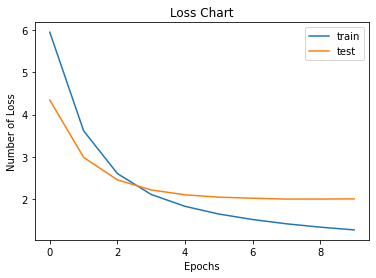

In [ ]:
plt.title('Loss Chart')
plt.plot(history['loss'], label='train')
plt.plot(history['val_loss'], label='test')
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Number of Loss")  
plt.show();

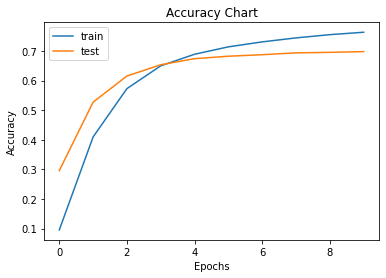

In [ ]:
plt.title('Accuracy Chart')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Accuracy")  
plt.show();

In [ ]:
model.save("/content/drive/MyDrive/Address_Clodeo/Address_Update/save_model/model_KP.h5")

#Custom Test

In [16]:
label_codex = df.Codex.unique()

In [24]:
new_text = ['STP NHI Bandung Setiabudi Hegarmanah']
# new_text = ['Kos Rafflesia 3 sukabirus citeurup']
seq = tokenizer.texts_to_sequences(new_text)
padded = pad_sequences(seq, maxlen=MAX_SEQUENCE_LENGTH)
pred = model.predict(padded)
labels = label_codex
print(pred, labels[np.argmax(pred)])

[[2.8608911e-09 2.8558496e-08 9.4739157e-08 ... 5.3586997e-09
  6.9101870e-11 9.4154140e-10]] 161


In [18]:
df_fix = pd.read_csv('/content/drive/MyDrive/Kuliah/KP/Clodeo/Colab Notebooks/Address_Update/clean_data/dataAddress_fix.csv')
# df_fix = pd.read_csv('/content/drive/MyDrive/Address_Clodeo/Address_Update/clean_data/dataAddress_fix.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning:

Columns (4) have mixed types.Specify dtype option on import or set low_memory=False.



In [19]:
df_fix

,street1,city,Subdistrict,StateProvince,PostalCode,Code,Codex
0,Gang Veteran RT 01 RW 07 No.9 \nKelurahan Lub...,KOTA ADM. JAKARTA TIMUR,CIPAYUNG,DKI JAKARTA,13810,31.75.10,0
1,Lingkungan TUMALIA kecamatan Turikale Keluraha...,KAB. MAROS,TURIKALE,SULAWESI SELATAN,NaN,73.09.14,1
2,ds kalimalang dsn sragi lor rt03 rw02,KAB. PONOROGO,SUKOREJO,JAWA TIMUR,NaN,35.02.15,2
3,Desa Gunung Tandla rt 01 Rw 01\nkec. KAwalu\nk...,KOTA TASIKMALAYA,KAWALU,JAWA BARAT,NaN,32.78.05,3
4,Ruko Mall Taman Palem No.70,KOTA ADM. JAKARTA BARAT,CENGKARENG,DKI JAKARTA,11730,31.73.01,4
...,...,...,...,...,...,...,...
8859235,"Blossomville W 08/28 Citra Raya, PANONGAN, KAB...",KAB. TANGERANG,PANONGAN,BANTEN,15711,36.03.19,204
8859236,"Perum grha palem indah no. A8 Joho, condong, D...",KAB. SLEMAN,DEPOK,DAERAH ISTIMEWA YOGYAKARTA,55282,34.04.07,102
8859237,Jln pandan gang pandan 3 no 23 kelurahan tangk...,KOTA PEKANBARU,BUKIT RAYA,RIAU,28289,14.71.07,1690
8859238,"KPP Pratama Cirebon Dua, Jl.Dr.Cipto Mangunkus...",KOTA CIREBON,KESAMBI,JAWA BARAT,45131,32.74.05,1059


In [25]:
cari_kecamatan = df_fix[df_fix['Codex'] == 161]
cari_kecamatan

,street1,city,Subdistrict,StateProvince,PostalCode,Code,Codex
196,Kantor Bank BRI Cabang Bandung Setiabudi\nJln....,KOTA BANDUNG,CIDADAP,JAWA BARAT,40141,32.73.08,161
3035,Kmp Bengkok No.1 RT/RW 01/01 Ciumbuleuit,KOTA BANDUNG,CIDADAP,JAWA BARAT,40142,32.73.08,161
3164,Jalan bukit jarian v rt 6 rw 11 no 39,KOTA BANDUNG,CIDADAP,JAWA BARAT,-,32.73.08,161
3710,Jalan cipaku 2 RT.05 RW.02 no.43 kelurahan ledeng,KOTA BANDUNG,CIDADAP,JAWA BARAT,40143,32.73.08,161
10144,\nJln. Dr Setiabudi No.170 F-G,KOTA BANDUNG,CIDADAP,JAWA BARAT,40141,32.73.08,161
...,...,...,...,...,...,...,...
8846851,"Jl. Budisari VII no 1, CIDADAP, KOTA BANDUNG, ...",KOTA BANDUNG,CIDADAP,JAWA BARAT,40141,32.73.08,161
8847002,Syl's Kitchen OBC Guest House\nJl. Ranca Benta...,KOTA BANDUNG,CIDADAP,JAWA BARAT,40142,32.73.08,161
8851655,Desa ciumbuleuit RT O6 RW 13 atas (RM.timbel w...,KOTA BANDUNG,CIDADAP,JAWA BARAT,NaN,32.73.08,161
8854074,Jln. Bukit raya atas punclut no 558A cihanja R...,KOTA BANDUNG,CIDADAP,JAWA BARAT,NaN,32.73.08,161
